# Data Exploration
This Jupiter contains some graphs and code useful to analyze to provided ratings.

In [1]:
# Useful starting lines
%matplotlib inline

import numpy as np
import scipy
import scipy.stats
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

### Load the Data
Note that `ratings` is a sparse matrix that in the shape of (num_items, num_users)

In [3]:
from jupyter_helpers import load_data, preprocess_data

path_dataset = "../data/data_train.csv"
ratings = load_data(path_dataset)

number of items: 1000, number of users: 10000


In [4]:
csr = ratings.asformat("csr").copy()
dense = ratings.todense()

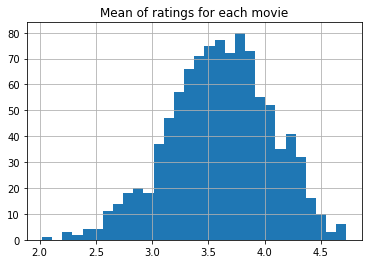

In [5]:
# Mean of ratings for each movie
means = []
for c in range(dense.shape[1]):
    col = dense[:,c]
    means.append(np.mean(col[col>0]))
plt.hist(means, bins=30);
plt.grid()
plt.title('Mean of ratings for each movie');

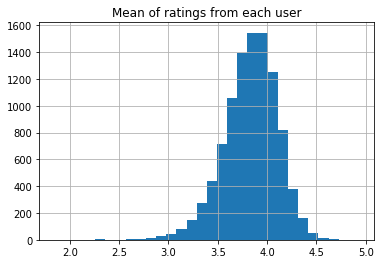

In [6]:
# Mean of ratings from each user
means = []
for r in range(dense.shape[0]):
    row = dense[r,:]
    means.append(np.mean(row[row>0]))
plt.hist(means, bins=30);
plt.grid()
plt.title('Mean of ratings from each user');

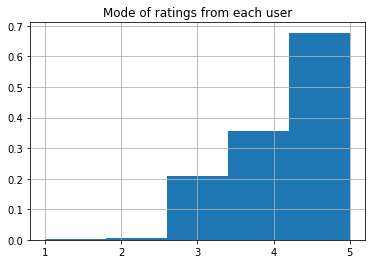

In [7]:
# Mode of ratings from each user
mode = []
for r in range(dense.shape[0]):
    row = dense[r,:]
    mode.append(scipy.stats.mode(row[row>0], axis=None)[0].item())
plt.hist(mode, bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid()
plt.title('Mode of ratings from each user');

Total ratings are: 1176952


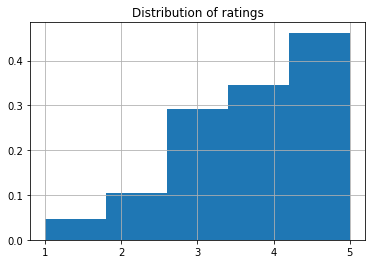

In [8]:
# Total ratings
print('Total ratings are: {}'.format(csr.count_nonzero()))

# Distribution of ratings
plt.hist(csr.data, bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid();
plt.title('Distribution of ratings');

### Bloggers
Bloggers are people with a lot of ratings

Treshold of ratings to be a blogger is: 252.71918505942264
Number of bloggers are: 467
Total ratings are: 140822


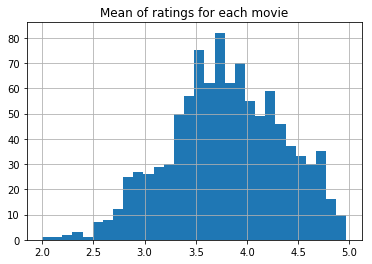

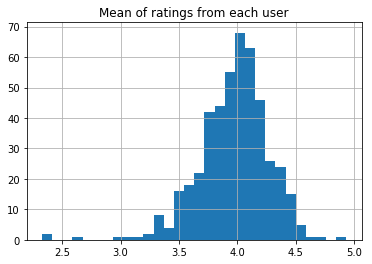

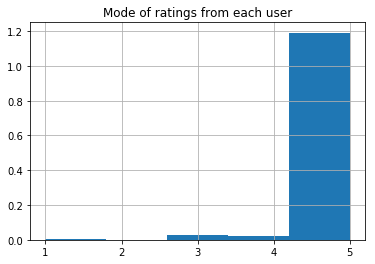

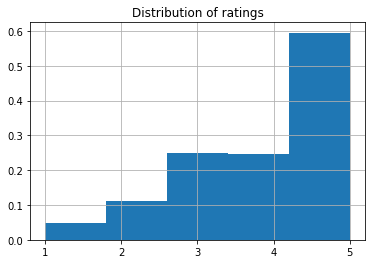

In [9]:
# Distribution of ratings for blogger

# Identify blogger as people with number of ratings > 0.95 (500 people)
num_rat = np.count_nonzero(dense.A, axis=1)
hist = np.histogram(num_rat)
rat_rand_val = scipy.stats.rv_histogram(hist)
blog_min_rat = rat_rand_val.ppf(0.95)
blogger_ind = np.where(num_rat>blog_min_rat)
blogger_rat = dense.A[blogger_ind]

# Print info
print('Treshold of ratings to be a blogger is: {}'.format(blog_min_rat))
print('Number of bloggers are: {}'.format(len(blogger_ind[0])))

# Mean of ratings for each movie
means = []
for c in range(blogger_rat.shape[1]):
    col = blogger_rat[:,c]
    means.append(np.mean(col[col>0]))
plt.figure()
plt.hist(means, bins=30);
plt.grid()
plt.title('Mean of ratings for each movie');

# Mean of ratings from each user
means = []
for r in range(blogger_rat.shape[0]):
    row = blogger_rat[r,:]
    means.append(np.mean(row[row>0]))
plt.figure()
plt.hist(means, bins=30);
plt.grid()
plt.title('Mean of ratings from each user');

# Mode of ratings from each user
mode = []
for r in range(blogger_rat.shape[0]):
    row = blogger_rat[r,:]
    mode.append(scipy.stats.mode(row[row>0], axis=None)[0].item())
plt.figure()
plt.hist(mode, bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid()
plt.title('Mode of ratings from each user');

# Total ratings
print('Total ratings are: {}'.format(np.count_nonzero(blogger_rat)))

# Distribution of ratings
plt.figure()
plt.hist(blogger_rat[blogger_rat>0].flatten(), bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid();
plt.title('Distribution of ratings');

In [10]:
len(blogger_ind[0])

467

### New Users
New users are people with few ratings

Treshold of ratings to be a new_user is: 19.008636644046884
Number of new_users are: 115
Total ratings are: 1736


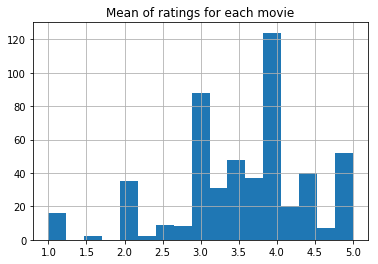

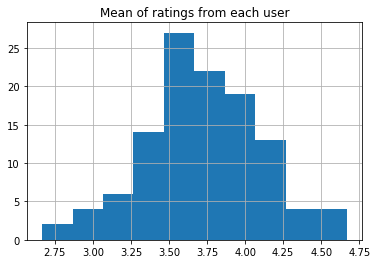

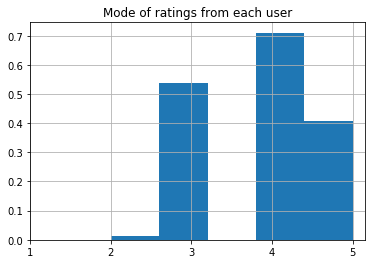

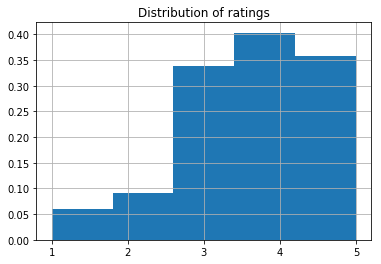

In [11]:
# Distribution of ratings for new users

# Identify ew users as people with number of ratings < 0.05
num_rat = np.count_nonzero(dense.A, axis=1)
hist = np.histogram(num_rat)
rat_rand_val = scipy.stats.rv_histogram(hist)
blog_min_rat = rat_rand_val.ppf(0.05)
blogger_ind = np.where(num_rat<blog_min_rat)
blogger_rat = dense.A[blogger_ind]

# Print info
print('Treshold of ratings to be a new_user is: {}'.format(blog_min_rat))
print('Number of new_users are: {}'.format(len(blogger_ind[0])))

# Mean of ratings for each movie
means = []
for c in range(blogger_rat.shape[1]):
    col = blogger_rat[:,c]
    if (col == 0).all():
        continue
    means.append(np.mean(col[col>0]))
plt.figure()
plt.hist(means, bins='auto');
plt.grid()
plt.title('Mean of ratings for each movie');

# Mean of ratings from each user
means = []
for r in range(blogger_rat.shape[0]):
    row = blogger_rat[r,:]
    means.append(np.mean(row[row>0]))
plt.figure()
plt.hist(means);
plt.grid()
plt.title('Mean of ratings from each user');

# Mode of ratings from each user
mode = []
for r in range(blogger_rat.shape[0]):
    row = blogger_rat[r,:]
    mode.append(scipy.stats.mode(row[row>0], axis=None)[0].item())
plt.figure()
plt.hist(mode, bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid()
plt.title('Mode of ratings from each user');

# Total ratings
print('Total ratings are: {}'.format(np.count_nonzero(blogger_rat)))

# Distribution of ratings
plt.figure()
plt.hist(blogger_rat[blogger_rat>0].flatten(), bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid();
plt.title('Distribution of ratings');

### Normal Users
Normal users are all the people which are neither blogger or new users

Treshold of ratings to be a new_user is: 252.71918505942264
Number of new_users are: 115
Total ratings are: 1034394


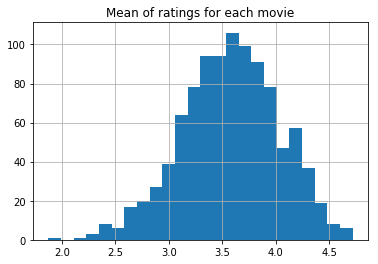

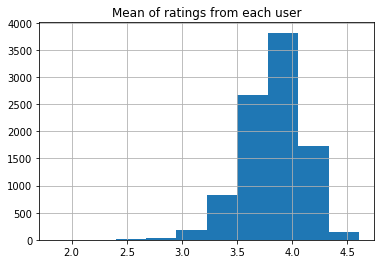

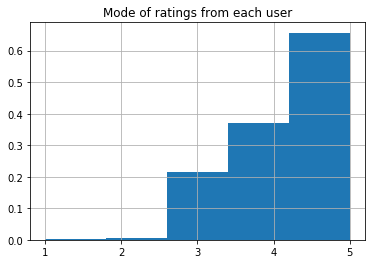

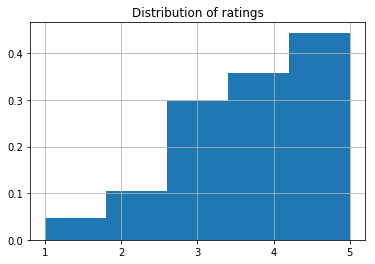

In [12]:
# Identify normal users
num_rat = np.count_nonzero(dense.A, axis=1)
hist = np.histogram(num_rat)
rat_rand_val = scipy.stats.rv_histogram(hist)
new_max_rat = rat_rand_val.ppf(0.05)
blog_min_rat = rat_rand_val.ppf(0.95)
normal_ind = np.where(np.logical_and(num_rat<blog_min_rat,num_rat>new_max_rat))
blogger_rat = dense.A[normal_ind]

# Print info
print('Treshold of ratings to be a new_user is: {}'.format(blog_min_rat))
print('Number of new_users are: {}'.format(len(blogger_ind[0])))

# Mean of ratings for each movie
means = []
for c in range(blogger_rat.shape[1]):
    col = blogger_rat[:,c]
    if (col == 0).all():
        continue
    means.append(np.mean(col[col>0]))
plt.figure()
plt.hist(means, bins='auto');
plt.grid()
plt.title('Mean of ratings for each movie');

# Mean of ratings from each user
means = []
for r in range(blogger_rat.shape[0]):
    row = blogger_rat[r,:]
    means.append(np.mean(row[row>0]))
plt.figure()
plt.hist(means);
plt.grid()
plt.title('Mean of ratings from each user');

# Mode of ratings from each user
mode = []
for r in range(blogger_rat.shape[0]):
    row = blogger_rat[r,:]
    mode.append(scipy.stats.mode(row[row>0], axis=None)[0].item())
plt.figure()
plt.hist(mode, bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid()
plt.title('Mode of ratings from each user');

# Total ratings
print('Total ratings are: {}'.format(np.count_nonzero(blogger_rat)))

# Distribution of ratings
plt.figure()
plt.hist(blogger_rat[blogger_rat>0].flatten(), bins=5, density=True);
plt.xticks([1,2,3,4,5]);
plt.grid();
plt.title('Distribution of ratings');

### Plot the number of ratings per movie and user

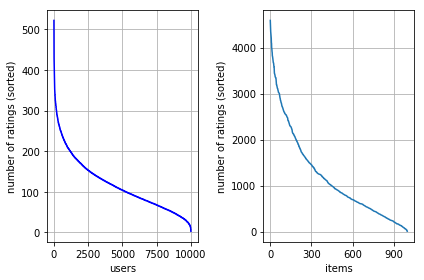

min # of ratings per movie = 8 
min # of ratings per user = 3.


In [13]:
from plots import plot_raw_data

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

print("min # of ratings per movie = {} \nmin # of ratings per user = {}.".format(
        min(num_users_per_item), min(num_items_per_user)))